<a href="https://colab.research.google.com/github/GabrieleGorreri/Sales_Analysis/blob/main/Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Montare Google Drive e cartella corretta**

In [1]:
# Install Google Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Set Directory folder

%cd '/content/drive/MyDrive/Colab Notebooks/Sales Analysis/Pandas-Data-Science-Tasks-master/SalesAnalysis'

/content/drive/MyDrive/Colab Notebooks/Sales Analysis/Pandas-Data-Science-Tasks-master/SalesAnalysis


In [3]:
# Check !

!pwd

/content/drive/MyDrive/Colab Notebooks/Sales Analysis/Pandas-Data-Science-Tasks-master/SalesAnalysis


# **Sales Analysis**

#### **Import Necessary Libraries**

In [4]:
import pandas as pd
import os
from tqdm import tqdm

#### **Task 1: Merging 12 months of sales data into a single CSV file**

In [5]:
df = pd.read_csv("Sales_Data/Sales_April_2019.csv")

files = [file for file in os.listdir('Sales_Data')]

for file in tqdm(files):
  print(file)

100%|██████████| 12/12 [00:00<00:00, 4756.35it/s]

Sales_May_2019.csv
Sales_December_2019.csv
Sales_October_2019.csv
Sales_June_2019.csv
Sales_November_2019.csv
Sales_July_2019.csv
Sales_February_2019.csv
Sales_March_2019.csv
Sales_September_2019.csv
Sales_January_2019.csv
Sales_April_2019.csv
Sales_August_2019.csv


In [6]:
all_months_data = pd.DataFrame()


for file in tqdm(files):
  df = pd.read_csv("Sales_Data/" + file)
  all_months_data = pd.concat([all_months_data, df])

all_months_data.head()

all_months_data.to_csv("all_data.csv", index = False)

100%|██████████| 12/12 [00:06<00:00,  1.96it/s]


In [7]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001"
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001"
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001"
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001"
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101"


#### **Question 1: What was the best month for sales? How much was earned that month?**

In [8]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [9]:
all_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

**Drop rows of NAN**

In [10]:
all_data[all_data.isna().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
58,NaN,NaN,NaN,NaN,NaN,NaN
111,NaN,NaN,NaN,NaN,NaN,NaN
522,NaN,NaN,NaN,NaN,NaN,NaN
839,NaN,NaN,NaN,NaN,NaN,NaN
1590,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
184588,NaN,NaN,NaN,NaN,NaN,NaN
185335,NaN,NaN,NaN,NaN,NaN,NaN
185553,NaN,NaN,NaN,NaN,NaN,NaN
185703,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
all_data.dropna(inplace=True)

**Month Colum**

In [12]:
# Add a month column

all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

<ipython-input-12-b99a0030c572>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Month'] = all_data['Order Date'].str[0:2]
<ipython-input-12-b99a0030c572>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Month'] = all_data['Month'].astype('int32')


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001",5
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001",5
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001",5
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001",5
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101",5


**Convert Columns to the correct type**

In [13]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

In [14]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  int32  
dtypes: float64(1), int32(1), int64(1), object(4)
memory usage: 10.6+ MB


**Sales Column**

In [15]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001",5,11.99
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001",5,3.84
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001",5,149.99
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001",5,11.99
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101",5,5.98


**Group By Month**

In [16]:
best_month = all_data.groupby('Month').sum()#.sort_values(by=['Sales'], ascending = False)
best_month

<ipython-input-16-f2429b05304e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  best_month = all_data.groupby('Month').sum()#.sort_values(by=['Sales'], ascending = False)


,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


**Graph**

In [17]:
import plotly.express as px

months = range(1,13)

fig = px.bar(data_frame = best_month,
              x=months,
              y="Sales",
              labels={months: "Months",
                     "Sales": "Sales"},
              title = "Best Month per Sales")
fig.show()

### **Question 2: What city had the highest number of sales?**

In [18]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001",5,11.99
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001",5,3.84
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001",5,149.99
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001",5,11.99
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101",5,5.98


**Add a City and a State columns**

In [19]:
# Let's use .apply()

def get_city(address):
  return address.split(',')[1]

def get_state(address):
  return address.split(',')[2].split(' ')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
#all_data['State'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[2])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001",5,11.99,New York City (NY)
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001",5,3.84,Dallas (TX)
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001",5,149.99,New York City (NY)
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001",5,11.99,Dallas (TX)
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101",5,5.98,Seattle (WA)


**Group By City**

In [20]:
best_city = all_data.groupby('City')['Sales'].sum()
#best_city = pd.DataFrame(best_city)
best_city

City
 Atlanta (GA)          2795498.58
 Austin (TX)           1819581.75
 Boston (MA)           3661642.01
 Dallas (TX)           2767975.40
 Los Angeles (CA)      5452570.80
 New York City (NY)    4664317.43
 Portland (ME)          449758.27
 Portland (OR)         1870732.34
 San Francisco (CA)    8262203.91
 Seattle (WA)          2747755.48
Name: Sales, dtype: float64

In [21]:
best_city.info()

<class 'pandas.core.series.Series'>
Index: 10 entries,  Atlanta (GA) to  Seattle (WA)
Series name: Sales
Non-Null Count  Dtype  
--------------  -----  
10 non-null     float64
dtypes: float64(1)
memory usage: 460.0+ bytes


Text(0, 0.5, 'Sales')

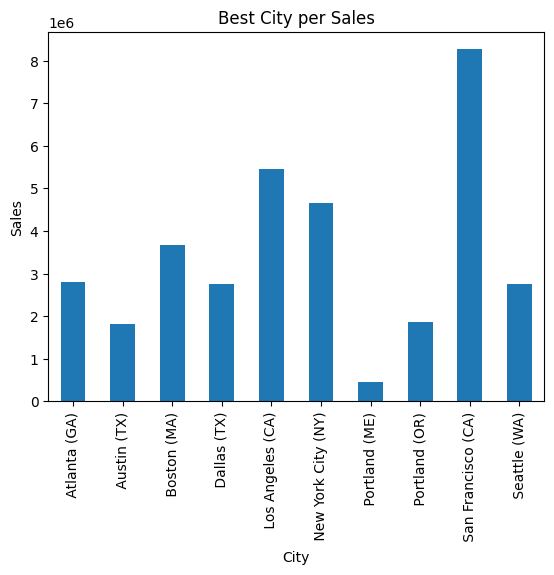

In [22]:
import matplotlib.pyplot as plt

best_city.plot(x='City',y='Sales',kind='bar', title = "Best City per Sales")

plt.xlabel('City')
plt.ylabel('Sales')

In [23]:
fig = px.bar(data_frame = best_city,
             #y='Sales',
             labels={"value": "Sales"},
             text_auto=True,
             title = "Best City per Sales")
fig.show()

### **Question 3: What time should we display advertisements to miximise likelihood of customer's buying products?**

In [24]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [25]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,194095,Wired Headphones,1,11.99,2019-05-16 17:14:00,"669 2nd St, New York City, NY 10001",5,11.99,New York City (NY),17,14
1,194096,AA Batteries (4-pack),1,3.84,2019-05-19 14:43:00,"844 Walnut St, Dallas, TX 75001",5,3.84,Dallas (TX),14,43
2,194097,27in FHD Monitor,1,149.99,2019-05-24 11:36:00,"164 Madison St, New York City, NY 10001",5,149.99,New York City (NY),11,36
3,194098,Wired Headphones,1,11.99,2019-05-02 20:40:00,"622 Meadow St, Dallas, TX 75001",5,11.99,Dallas (TX),20,40
4,194099,AAA Batteries (4-pack),2,2.99,2019-05-11 22:55:00,"17 Church St, Seattle, WA 98101",5,5.98,Seattle (WA),22,55


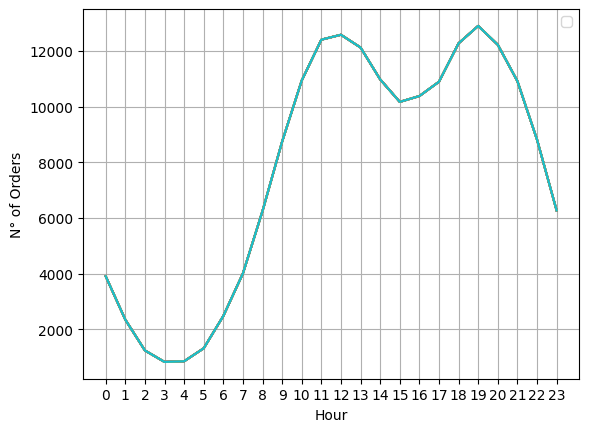

In [26]:
# Take unique value of hour [0,1,2,3,4,5,...,23]
hours = [hour for hour, df in all_data.groupby('Hour')]

# Graph
plt.plot(hours,all_data.groupby('Hour').count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('N° of Orders')
plt.legend()
plt.grid()
plt.show()

### **Questione 4: What products are most often sold togheter?**

In [27]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,194095,Wired Headphones,1,11.99,2019-05-16 17:14:00,"669 2nd St, New York City, NY 10001",5,11.99,New York City (NY),17,14
1,194096,AA Batteries (4-pack),1,3.84,2019-05-19 14:43:00,"844 Walnut St, Dallas, TX 75001",5,3.84,Dallas (TX),14,43
2,194097,27in FHD Monitor,1,149.99,2019-05-24 11:36:00,"164 Madison St, New York City, NY 10001",5,149.99,New York City (NY),11,36
3,194098,Wired Headphones,1,11.99,2019-05-02 20:40:00,"622 Meadow St, Dallas, TX 75001",5,11.99,Dallas (TX),20,40
4,194099,AAA Batteries (4-pack),2,2.99,2019-05-11 22:55:00,"17 Church St, Seattle, WA 98101",5,5.98,Seattle (WA),22,55


In [28]:
# Select duplicate rows with keep = False
df = all_data[all_data['Order ID'].duplicated(keep=False)]

# Nuova colonna con prodotti dello stesso ordine uniti
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

# Tengo righe singole degli ordini duplicati
df = df[['Order ID','Grouped']].drop_duplicates()

df.head(10)

<ipython-input-28-b21a2acad13c>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Order ID,Grouped
15,194110,"Google Phone,Wired Headphones"
77,194170,"Google Phone,USB-C Charging Cable"
82,194174,"iPhone,Lightning Charging Cable,Wired Headphones"
89,194179,"Flatscreen TV,AAA Batteries (4-pack)"
103,194192,"Wired Headphones,Bose SoundSport Headphones"
116,194203,"iPhone,Lightning Charging Cable"
119,194205,"iPhone,Wired Headphones"
168,194253,"iPhone,Lightning Charging Cable,Wired Headphon..."
212,194294,"Macbook Pro Laptop,Bose SoundSport Headphones"
233,194314,"Google Phone,USB-C Charging Cable,Wired Headph..."


In [29]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
# Trasformiamo la colonna Grouped in una lista di liste, poi si contano le combinazioni

from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']: # entriamo in ogni riga della colonna Grouped
  row_list = row.split(',') # dividiamo gli oggetti quando c'è una virgola
  count.update(Counter(combinations(row_list, 2))) # modificando il numero alla fine, vediamo gli oggetti più venduti in coppie, in 3, in 4, ecc...

# Vediamo quali sono le coppie più vendute

## Primo metodo (libreria Counter)
count.most_common(10)
## Secondo metodo (for loop)
# for key, value in  count.most_common(10):
#   print(key,value)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

### **Question 5: What product sold the most? Why do you think it sold the most?**

In [30]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,194095,Wired Headphones,1,11.99,2019-05-16 17:14:00,"669 2nd St, New York City, NY 10001",5,11.99,New York City (NY),17,14
1,194096,AA Batteries (4-pack),1,3.84,2019-05-19 14:43:00,"844 Walnut St, Dallas, TX 75001",5,3.84,Dallas (TX),14,43
2,194097,27in FHD Monitor,1,149.99,2019-05-24 11:36:00,"164 Madison St, New York City, NY 10001",5,149.99,New York City (NY),11,36
3,194098,Wired Headphones,1,11.99,2019-05-02 20:40:00,"622 Meadow St, Dallas, TX 75001",5,11.99,Dallas (TX),20,40
4,194099,AAA Batteries (4-pack),2,2.99,2019-05-11 22:55:00,"17 Church St, Seattle, WA 98101",5,5.98,Seattle (WA),22,55


In [31]:
# Group by per multiple columns with more aggregation functions


product_group = all_data.groupby(['Product']).agg({'Quantity Ordered':'sum',
                                                 'Price Each':'mean'}).sort_values(by = 'Quantity Ordered', ascending=False).reset_index()
product_group

,Product,Quantity Ordered,Price Each
0,AAA Batteries (4-pack),31017,2.99
1,AA Batteries (4-pack),27635,3.84
2,USB-C Charging Cable,23975,11.95
3,Lightning Charging Cable,23217,14.95
4,Wired Headphones,20557,11.99
5,Apple Airpods Headphones,15661,150.00
6,Bose SoundSport Headphones,13457,99.99
7,27in FHD Monitor,7550,149.99
8,iPhone,6849,700.00
9,27in 4K Gaming Monitor,6244,389.99


In [32]:
product_group.columns

Index(['Product', 'Quantity Ordered', 'Price Each'], dtype='object')

In [33]:
# Graph of the most sold products

product_group = pd.DataFrame(product_group)

fig = px.bar(data_frame = product_group,
             y = 'Quantity Ordered',
             title = "Most sold products")

fig.update_yaxes()

fig.show()

In [34]:
# Referenced: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib

# Double Graph

from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Bar(x=product_group['Product'], y=product_group['Quantity Ordered'], name="yaxis data"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=product_group['Product'], y=product_group['Price Each'], name="yaxis2 data"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="Products: items sold vs price"
)

# Set x-axis title
fig.update_xaxes(title_text="Product")

# Set y-axes titles
fig.update_yaxes(title_text="QUantity Ordered", secondary_y=False)
fig.update_yaxes(title_text="Price (USD)", secondary_y=True)

fig.show()
